In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_dev = pd.read_csv("development.tsv", sep='\t')
df_eval = pd.read_csv("evaluation.tsv", sep='\t')

In [98]:
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [99]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1205 non-null   int64  
 1   weekofyear              1205 non-null   int64  
 2   week_start_date         1205 non-null   object 
 3   PERSIANN_precip_mm      1194 non-null   float64
 4   NCEP_air_temp_k         1197 non-null   float64
 5   NCEP_avg_temp_k         1197 non-null   float64
 6   NCEP_dew_point_temp_k   1197 non-null   float64
 7   NCEP_max_air_temp_k     1197 non-null   float64
 8   NCEP_min_air_temp_k     1197 non-null   float64
 9   NCEP_precip_kg_per_m2   1197 non-null   float64
 10  NCEP_humidity_percent   1197 non-null   float64
 11  NCEP_precip_mm          1194 non-null   float64
 12  NCEP_humidity_g_per_kg  1197 non-null   float64
 13  NCEP_diur_temp_rng_k    1197 non-null   float64
 14  avg_temp_c              1173 non-null   

In [100]:
df_dev.head()

,year,weekofyear,week_start_date,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,...,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases,city
0,2000,26,2000-07-01,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,...,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,iq
1,2000,27,2000-07-08,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,...,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,iq
2,2000,28,2000-07-15,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,...,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,iq
3,2000,29,2000-07-22,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,...,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,iq
4,2000,30,2000-07-29,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,...,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,iq


In [101]:
df_dev.describe()

,year,weekofyear,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,NCEP_humidity_percent,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases
count,1205.000000,1205.000000,1194.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1194.000000,1197.000000,1197.000000,1173.000000,1173.000000,1193.000000,1193.000000,1190.000000,1205.000000
mean,1999.623237,27.009129,44.906533,298.715226,299.203354,295.191122,303.252799,295.797327,38.365823,81.770154,44.906533,16.684940,4.752142,27.178070,7.945935,32.375524,22.150042,40.189076,26.517842
std,4.847247,14.944162,44.607227,1.339849,1.245218,1.542649,3.241444,2.566590,42.547069,6.760307,44.607227,1.544943,3.606676,1.280489,2.032523,1.870180,1.606453,49.187120,46.582143
min,1990.000000,1.000000,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1996.000000,14.000000,8.540000,297.675714,298.257143,294.037143,300.900000,294.000000,12.800000,77.357143,8.540000,15.488571,2.285714,26.300000,6.528571,31.100000,21.100000,8.700000,5.000000
50%,2001.000000,27.000000,36.610000,298.682857,299.292857,295.568571,302.300000,296.300000,26.100000,80.255714,36.610000,17.010000,2.728571,27.400000,7.242857,32.800000,22.200000,24.100000,13.000000
75%,2004.000000,40.000000,68.705000,299.850000,300.150000,296.424286,305.100000,298.000000,49.200000,84.467143,68.705000,17.940000,7.371429,28.157143,9.300000,33.700000,23.300000,55.100000,30.000000
max,2007.000000,53.000000,390.600000,302.200000,302.928571,297.852857,314.000000,299.900000,570.500000,98.457143,390.600000,19.731429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [102]:
df_dev[df_dev.duplicated()]

,year,weekofyear,week_start_date,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,...,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases,city


In [103]:
df_dev.isnull().sum()

year                       0
weekofyear                 0
week_start_date            0
PERSIANN_precip_mm        11
NCEP_air_temp_k            8
NCEP_avg_temp_k            8
NCEP_dew_point_temp_k      8
NCEP_max_air_temp_k        8
NCEP_min_air_temp_k        8
NCEP_precip_kg_per_m2      8
NCEP_humidity_percent      8
NCEP_precip_mm            11
NCEP_humidity_g_per_kg     8
NCEP_diur_temp_rng_k       8
avg_temp_c                32
diur_temp_rng_c           32
max_temp_c                12
min_temp_c                12
precip_mm                 15
total_cases                0
city                       0
dtype: int64

In [104]:
mask = df_dev["NCEP_air_temp_k"].isnull()
df_dev[mask]

,year,weekofyear,week_start_date,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,...,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases,city
182,2004,1,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,iq
234,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,iq
477,1992,1,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,sj
529,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,sj
789,1998,1,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,sj
841,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,sj
1101,2004,1,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,sj
1153,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,sj


In [105]:
mask = df_dev["avg_temp_c"].isnull()
df_dev[mask]

,year,weekofyear,week_start_date,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,...,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases,city
45,2001,20,2001-05-14,74.08,297.297143,298.307143,296.990000,305.6,294.7,80.30,...,74.08,18.640000,5.642857,NaN,NaN,32.5,NaN,0.0,0,iq
51,2001,26,2001-06-25,1.22,294.845714,296.000000,290.572857,306.1,288.4,1.82,...,1.22,12.464286,12.342857,NaN,NaN,32.3,17.1,31.0,0,iq
95,2002,18,2002-04-30,60.05,297.408571,298.550000,296.222857,303.8,292.8,52.60,...,60.05,17.807143,7.500000,NaN,NaN,33.5,21.2,1.0,9,iq
111,2002,34,2002-08-20,31.71,296.184286,296.735714,292.451429,308.6,288.8,5.61,...,31.71,14.045714,12.757143,NaN,NaN,33.1,20.8,70.6,4,iq
121,2002,44,2002-10-29,89.77,298.518571,300.242857,296.900000,307.3,294.9,39.70,...,89.77,18.602857,9.028571,NaN,NaN,34.1,22.5,34.1,28,iq
137,2003,8,2003-02-19,25.03,298.567143,300.100000,296.392857,308.6,292.5,41.10,...,25.03,18.020000,10.885714,NaN,NaN,32.4,23.3,121.9,3,iq
182,2004,1,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,iq
203,2004,22,2004-05-27,35.43,297.305714,298.328571,295.958571,306.4,291.7,42.60,...,35.43,17.500000,9.628571,NaN,NaN,33.3,20.5,28.2,5,iq
212,2004,31,2004-07-29,85.96,296.017143,297.292857,294.471429,306.1,291.7,27.62,...,85.96,15.975714,8.842857,NaN,NaN,32.9,19.4,6.0,6,iq
213,2004,32,2004-08-05,29.82,297.517143,298.964286,293.144286,307.4,291.0,3.90,...,29.82,14.694286,12.157143,NaN,NaN,34.0,18.3,55.1,5,iq


In [106]:
mask = df_dev["min_temp_c"].isnull()
df_dev[mask]

,year,weekofyear,week_start_date,PERSIANN_precip_mm,NCEP_air_temp_k,NCEP_avg_temp_k,NCEP_dew_point_temp_k,NCEP_max_air_temp_k,NCEP_min_air_temp_k,NCEP_precip_kg_per_m2,...,NCEP_precip_mm,NCEP_humidity_g_per_kg,NCEP_diur_temp_rng_k,avg_temp_c,diur_temp_rng_c,max_temp_c,min_temp_c,precip_mm,total_cases,city
45,2001,20,2001-05-14,74.08,297.297143,298.307143,296.990000,305.6,294.7,80.3,...,74.08,18.640000,5.642857,NaN,NaN,32.5,NaN,0.0,0,iq
182,2004,1,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,iq
231,2004,50,2004-12-09,70.04,297.787143,298.835714,296.574286,305.8,294.5,91.0,...,70.04,18.207143,6.500000,NaN,NaN,NaN,NaN,9.9,116,iq
234,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,iq
271,2005,37,2005-09-17,18.66,298.880000,299.807143,295.658571,307.3,292.9,35.3,...,18.66,17.222857,9.928571,NaN,NaN,NaN,NaN,1.3,0,iq
336,2006,50,2006-12-17,157.75,298.158571,299.071429,297.351429,304.4,294.2,63.0,...,157.75,19.111429,6.400000,NaN,NaN,33.8,NaN,NaN,0,iq
477,1992,1,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,sj
529,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,sj
789,1998,1,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,sj
841,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,sj


In [107]:
df_dev.nunique()

year                        18
weekofyear                  53
week_start_date            919
PERSIANN_precip_mm         954
NCEP_air_temp_k            997
NCEP_avg_temp_k            552
NCEP_dew_point_temp_k     1005
NCEP_max_air_temp_k        140
NCEP_min_air_temp_k        113
NCEP_precip_kg_per_m2      874
NCEP_humidity_percent     1144
NCEP_precip_mm             954
NCEP_humidity_g_per_kg    1002
NCEP_diur_temp_rng_k       453
avg_temp_c                 448
diur_temp_rng_c            425
max_temp_c                  69
min_temp_c                  73
precip_mm                  612
total_cases                130
city                         2
dtype: int64

In [108]:
kelvin_features = ['NCEP_air_temp_k', 'NCEP_avg_temp_k', 'NCEP_dew_point_temp_k',
       'NCEP_max_air_temp_k', 'NCEP_min_air_temp_k'] 
for f in kelvin_features:
    df_dev[f] = df_dev[f]-273.15
    df_eval[f] = df_eval[f]-273.15

In [109]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 5000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)#.remove("week_start_date")
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(df_dev, 20, 5)

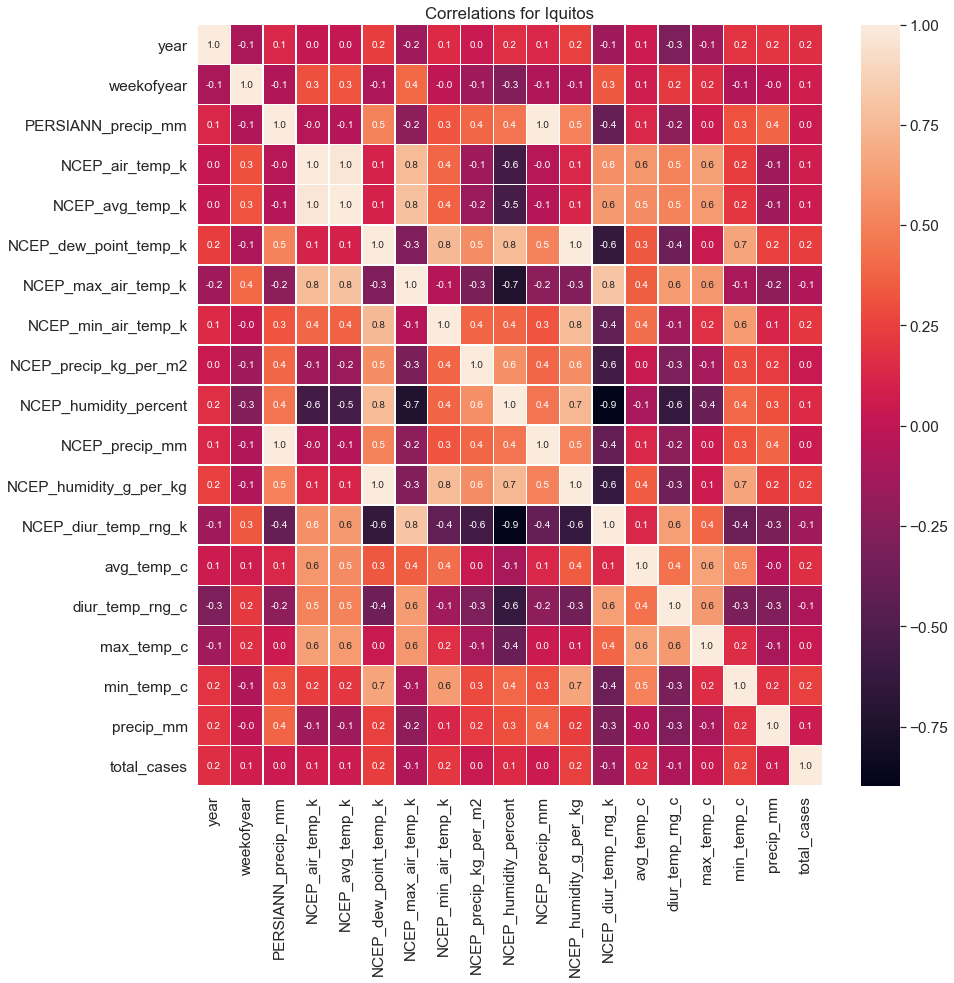

In [110]:
f,ax = plt.subplots(figsize=(14, 14))
mask = df_dev['city']=="iq"
sns.heatmap(df_dev[mask].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for Iquitos')
plt.show()

Text(0.5, 1.0, 'Correlations for Iquitos')

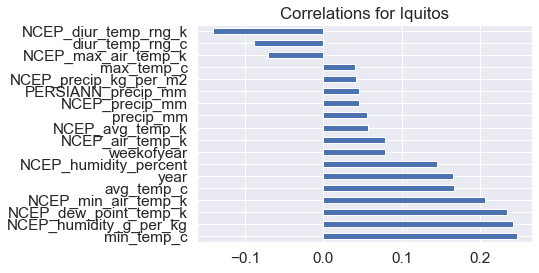

In [111]:
iq_correlations = df_dev[mask].corr()
(iq_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for Iquitos')

Text(0.5, 1.0, 'City')

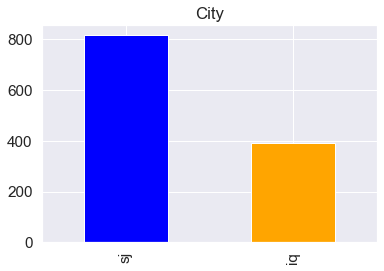

In [112]:
df_dev['city'].value_counts().plot(kind='bar', color = {"blue", "orange"}).set_title('City')



In [113]:
mask_sj = df_dev[df_dev["city"]=="sj"]
mask_iq = df_dev[df_dev["city"]=="iq"]

(0.0, 60.0)

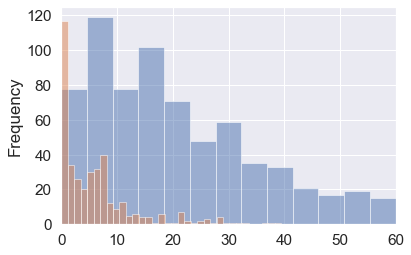

In [114]:
mask_sj["total_cases"].plot.hist(bins=100, alpha=0.5)
mask_iq["total_cases"].plot.hist(bins=100, alpha=0.5)
plt.xlim(0, 60)
#plt.xlim(0, 100)



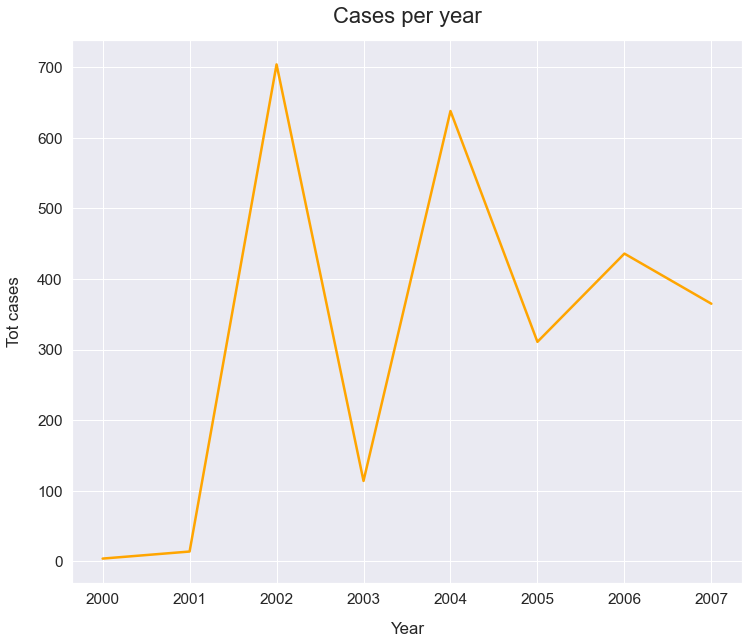

In [115]:
#total cases per year
mask = df_dev["city"]== "iq"
grouped_per_year=df_dev[mask].groupby(['year'])['total_cases'].agg('sum')
sns.set(font_scale=1.4)
grouped_per_year.plot(figsize=(12, 10), linewidth=2.5, color='orange')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Tot cases", labelpad=15)
plt.title("Cases per year", y=1.02, fontsize=22);

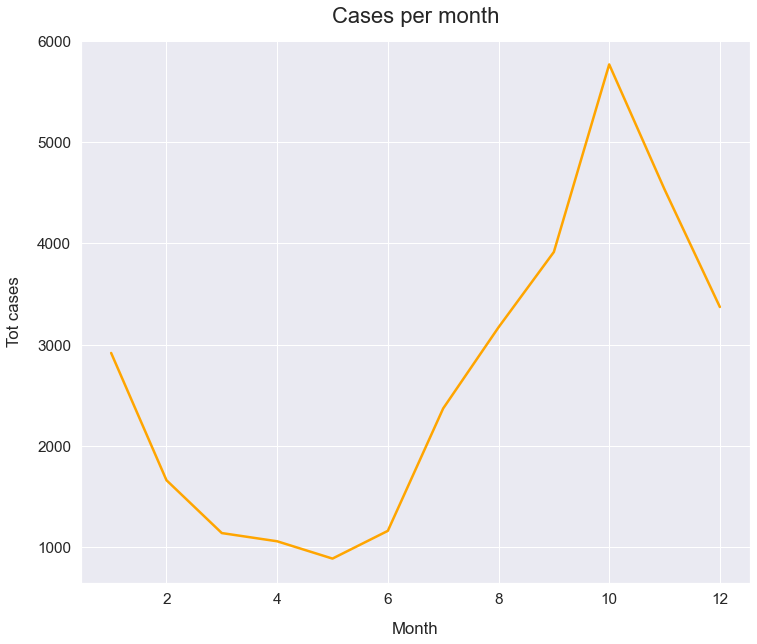

In [116]:
#total cases per month
df_dev['month'] = pd.DatetimeIndex(df_dev['week_start_date']).month
df_eval['month'] = pd.DatetimeIndex(df_eval['week_start_date']).month


grouped_per_month=df_dev.groupby(['month'])['total_cases'].agg('sum')
sns.set(font_scale=1.4)
grouped_per_month.plot(figsize=(12, 10), linewidth=2.5, color='orange')
plt.xlabel("Month", labelpad=15)
plt.ylabel("Tot cases", labelpad=15)
plt.title("Cases per month", y=1.02, fontsize=22);

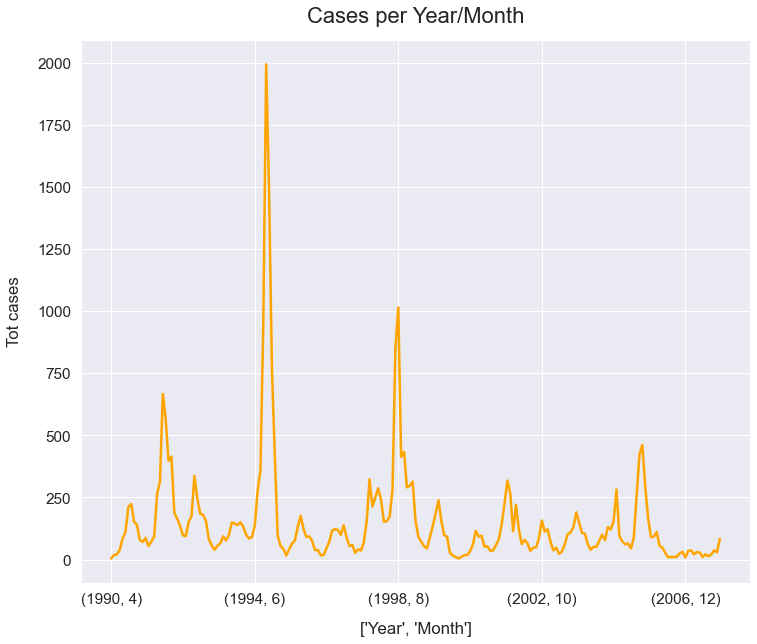

In [117]:
#total cases per month
grouped_per_month=df_dev.groupby(['year','month'])['total_cases'].agg('sum')
sns.set(font_scale=1.4)
grouped_per_month.plot(figsize=(12, 10), linewidth=2.5, color='orange')
plt.xlabel(["Year","Month"], labelpad=15)
plt.ylabel("Tot cases", labelpad=15)
plt.title("Cases per Year/Month", y=1.02, fontsize=22);

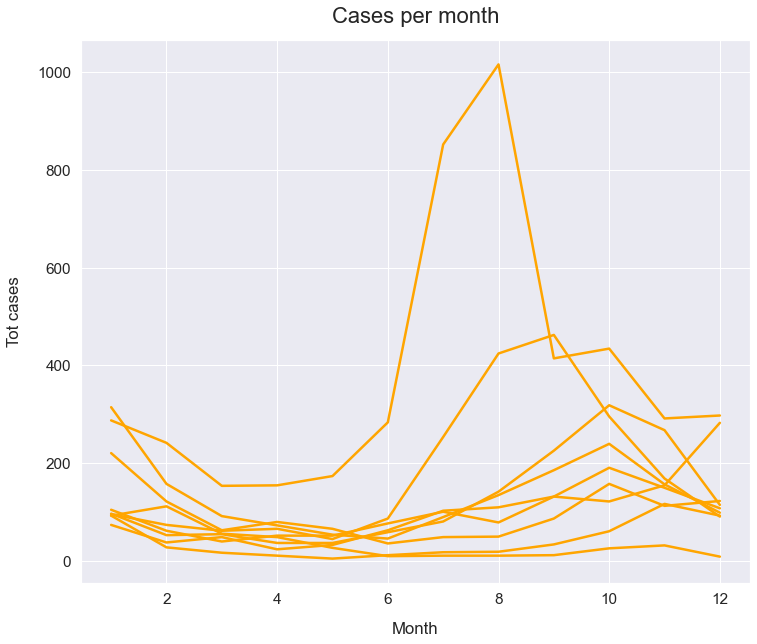

In [118]:
#total cases per month
c= 0.2
#list(matplotlib.colors.cnames.values())
for i in range(1998, 2007):
    c = c+0.05
    mask = df_dev["year"]== i
    grouped_per_month=df_dev[mask].groupby(['month'])['total_cases'].agg('sum')
    sns.set(font_scale=1.4)
    grouped_per_month.plot(figsize=(12, 10), linewidth=2.5, color='orange')
    plt.xlabel("Month", labelpad=15)
    plt.ylabel("Tot cases", labelpad=15)
    plt.title("Cases per month", y=1.02, fontsize=22);

/Users/stefanogalvagno/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases'>

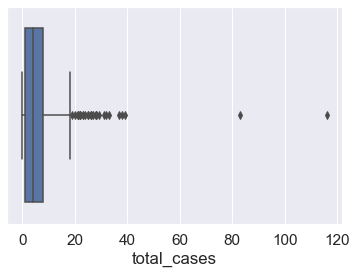

In [119]:
sj_dev = df_dev[df_dev['city']=="sj"]
#sns.boxplot(sj_dev['total_cases'])
iq_dev = df_dev[df_dev['city']=="iq"]
sns.boxplot(iq_dev['total_cases'])

In [120]:
print(np.where(df_dev['total_cases']>70))

(array([ 230,  231,  417,  458,  462,  463,  464,  465,  466,  467,  468,
        469,  470,  471,  472,  473,  474,  475,  477,  478,  479,  480,
        514,  518,  611,  612,  613,  614,  615,  616,  617,  618,  619,
        620,  621,  622,  623,  624,  625,  626,  627,  628,  629,  630,
        631,  632,  633,  634,  635,  780,  794,  813,  814,  815,  816,
        817,  818,  819,  820,  821,  822,  823,  824,  825,  827,  828,
        829,  830,  835,  836,  838,  839,  843,  844,  988,  989,  990,
        991, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192]),)


In [121]:
# IQR
Q1 = np.percentile(df_dev['total_cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_dev['total_cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_dev.shape)
 
# Upper bound
upper = np.where(df_dev['total_cases'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_dev['total_cases'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_dev.drop(upper[0], inplace = True)
df_dev.drop(lower[0], inplace = True)
 
print("New Shape: ", df_dev.shape)

Old Shape:  (1205, 22)
New Shape:  (1109, 22)


<AxesSubplot:>

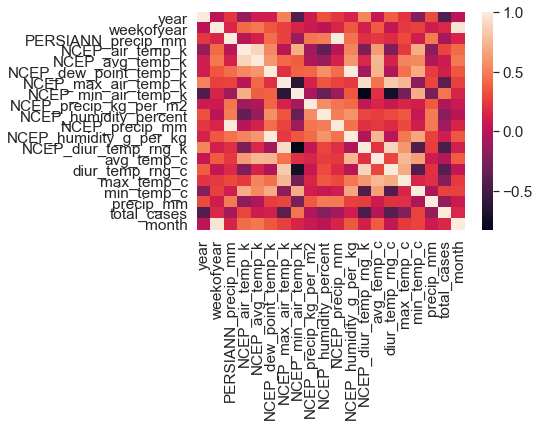

In [122]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df_dev.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [123]:
correlated_features = set()


for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)


{'month', 'NCEP_diur_temp_rng_k', 'NCEP_precip_mm', 'NCEP_humidity_g_per_kg'}


In [124]:
#this operation is justified ONLY by the fact that evaluation data 
#does not contain records from San Juan


df_dev = df_dev[df_dev["city"]=="iq"]
#df_eval = df_eval[df_eval["city"]=="iq"]



In [125]:
df_unique = pd.concat([df_dev, df_eval], sort=False) 
print(len(df_dev), len(df_eval), len(df_unique))

388 364 752


In [126]:
for col_name in df_unique.columns:
    if(col_name != "total_cases"):
        #df_unique[col_name].fillna(method='ffill', inplace=True)
        df_unique[col_name] = df_unique[col_name].interpolate(method='linear')

In [127]:
df_unique.columns

Index(['year', 'weekofyear', 'week_start_date', 'PERSIANN_precip_mm',
       'NCEP_air_temp_k', 'NCEP_avg_temp_k', 'NCEP_dew_point_temp_k',
       'NCEP_max_air_temp_k', 'NCEP_min_air_temp_k', 'NCEP_precip_kg_per_m2',
       'NCEP_humidity_percent', 'NCEP_precip_mm', 'NCEP_humidity_g_per_kg',
       'NCEP_diur_temp_rng_k', 'avg_temp_c', 'diur_temp_rng_c', 'max_temp_c',
       'min_temp_c', 'precip_mm', 'total_cases', 'city', 'month'],
      dtype='object')

In [128]:
from sklearn.model_selection import train_test_split

df_1h_unique = df_unique #pd.get_dummies(df_unique, columns=['city'])
correlated_features.add("week_start_date")
correlated_features.add("city")
correlated_features.remove("month")






df_dropped_unique = df_1h_unique.drop(columns=correlated_features)

train_valid_mask = ~df_dropped_unique["total_cases"].isna()

feature_names = df_dropped_unique[train_valid_mask].drop(columns=["total_cases"]).columns

X = df_dropped_unique.drop(columns=["total_cases"]).values 
y = df_dropped_unique["total_cases"].values
X_train_valid = X[train_valid_mask] 
y_train_valid = y[train_valid_mask]

X_test = X[~train_valid_mask] 
y_test = y[~train_valid_mask]


X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)




In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [130]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error

reg = RandomForestRegressor()
reg.fit(X_train, y_train)


print(mean_absolute_error(y_valid, reg.predict(X_valid)))

3.073298969072165


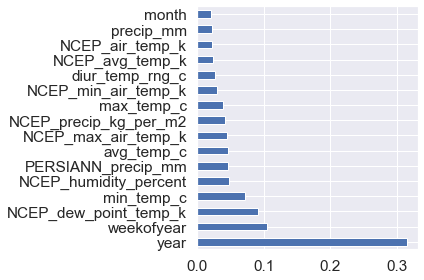

In [131]:
feat_importances = pd.Series(reg.feature_importances_, index=df_dropped_unique.drop(columns=["total_cases"]).columns)
important_columns = feat_importances.nlargest(40)
important_columns.plot(kind='barh')
#feat_importances.nlargest(40)
plt.tight_layout()
plt.savefig("imp.eps")

In [ ]:
y_pred = reg.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output0.csv", index_label="Id", header=["Predicted"])



In [90]:
import sklearn
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": [2, 4, 6, 8, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 4, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "n_estimators": [100, 250, 500],
              "random_state": [42], 
              "n_jobs": [-1],
              }
# run grid search
gs = GridSearchCV(reg, param_grid=param_grid, cv=10)
gs.fit(X_train, y_train)
print(gs.best_params_)
best_configured_model = gs.best_estimator_
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))

{'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
6.084154290853032


In [132]:
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))
gs.best_params_

y_pred = best_configured_model.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output42.csv", index_label="Id", header=["Predicted"])



6.876127314479829


In [133]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_valid)
print(mean_absolute_error(y_valid, knn.predict(X_valid)))

4.851921274601687


In [134]:
from sklearn.model_selection import GridSearchCV


param_grid = {"metric" : ['manhattan', 'chebyshev', 'euclidean'],
              "n_neighbors" : [5, 10, 20],
              "weights" : ['uniform', 'distance'],
              "n_jobs": [-1],
              }

# run grid search
gsK = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
gsK.fit(X_train, y_train)
print(gsK.best_params_)
best_configured_model = gsK.best_estimator_
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))

{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 20, 'weights': 'distance'}
4.520944778880507


In [135]:
y_pred = best_configured_model.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output44.csv", index_label="Id", header=["Predicted"])
#4,66
#best model so far {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 20, 'weights': 'distance'}

In [136]:
param_grid = { "normalize": [True, False],
               "alpha": [1, 0.1, 0.05], 
               "tol": [1e-3, 1e-6],
               "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
             }
# run grid search
gsr = GridSearchCV(Ridge(), param_grid=param_grid, cv=5)
gsr.fit(X_train, y_train)
print(gsr.best_params_)
best_configured_model = gsr.best_estimator_
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))


{'alpha': 1, 'normalize': True, 'solver': 'lsqr', 'tol': 0.001}
4.853116251148611


In [46]:
y_pred = best_configured_model.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output40.csv", index_label="Id", header=["Predicted"])



In [137]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'random_state':[42]}

gsA=GridSearchCV(estimator=ada,param_grid=search_grid, scoring='neg_mean_absolute_error',n_jobs=-1,cv=5)
gsA.fit(X_train, y_train)
print(gsA.best_params_)
best_configured_model = gsA.best_estimator_
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))



{'learning_rate': 0.001, 'n_estimators': 500, 'random_state': 42}
3.374528160313783


In [78]:
y_pred = best_configured_model.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output42.csv", index_label="Id", header=["Predicted"])




In [138]:
param_grid = { "kernel": ["poly", "rbf", "sigmoid"],
               "max_iter": [5000, 10000],
               "tol": [1e-3, 1e-4],
             }
# run grid search
gsS = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
gsS.fit(X_train, y_train)
print(gsS.best_params_)
best_configured_model = gsS.best_estimator_
print(mean_absolute_error(y_valid, best_configured_model.predict(X_valid)))

/Users/stefanogalvagno/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/stefanogalvagno/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/stefanogalvagno/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/stefanogalvagno/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Cons

{'kernel': 'rbf', 'max_iter': 5000, 'tol': 0.001}
4.236620777510141


In [49]:
y_pred = best_configured_model.predict(X_test)
pd.DataFrame(y_pred, index=df_unique[~train_valid_mask].index).to_csv("output41.csv", index_label="Id", header=["Predicted"])

